# Random Forest Decision Tree

Author: Nutan Mandale

Mentor: Vincent Ramdhanie

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
%matplotlib inline

In [3]:
data = pd.read_csv("./2016.csv")

In [4]:
data.head(3)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


###Preprocessing

In [6]:
data.shape

(157, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country                          157 non-null object
Region                           157 non-null object
Happiness Rank                   157 non-null int64
Happiness Score                  157 non-null float64
Lower Confidence Interval        157 non-null float64
Upper Confidence Interval        157 non-null float64
Economy (GDP per Capita)         157 non-null float64
Family                           157 non-null float64
Health (Life Expectancy)         157 non-null float64
Freedom                          157 non-null float64
Trust (Government Corruption)    157 non-null float64
Generosity                       157 non-null float64
Dystopia Residual                157 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 16.0+ KB


In [8]:
from sklearn import model_selection, preprocessing
for Country in data.columns:
    if data[Country].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(data[Country].values)) 
        data[Country] = lbl.transform(list(data[Country].values))

In [9]:
data.head(3)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,37,9,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,134,9,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,57,9,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


In [10]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

### Decision Tree

In [11]:
#initialize train-test split
from sklearn.cross_validation import train_test_split
y = data['Happiness Score']
X = data.drop(['Happiness Score'], axis=1)

C:\Users\NutanMandale\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
X.shape

(157, 12)

In [13]:
y.head()

0    7.526
1    7.509
2    7.501
3    7.498
4    7.413
Name: Happiness Score, dtype: float64

In [14]:
data.dtypes

Country                            int64
Region                             int64
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

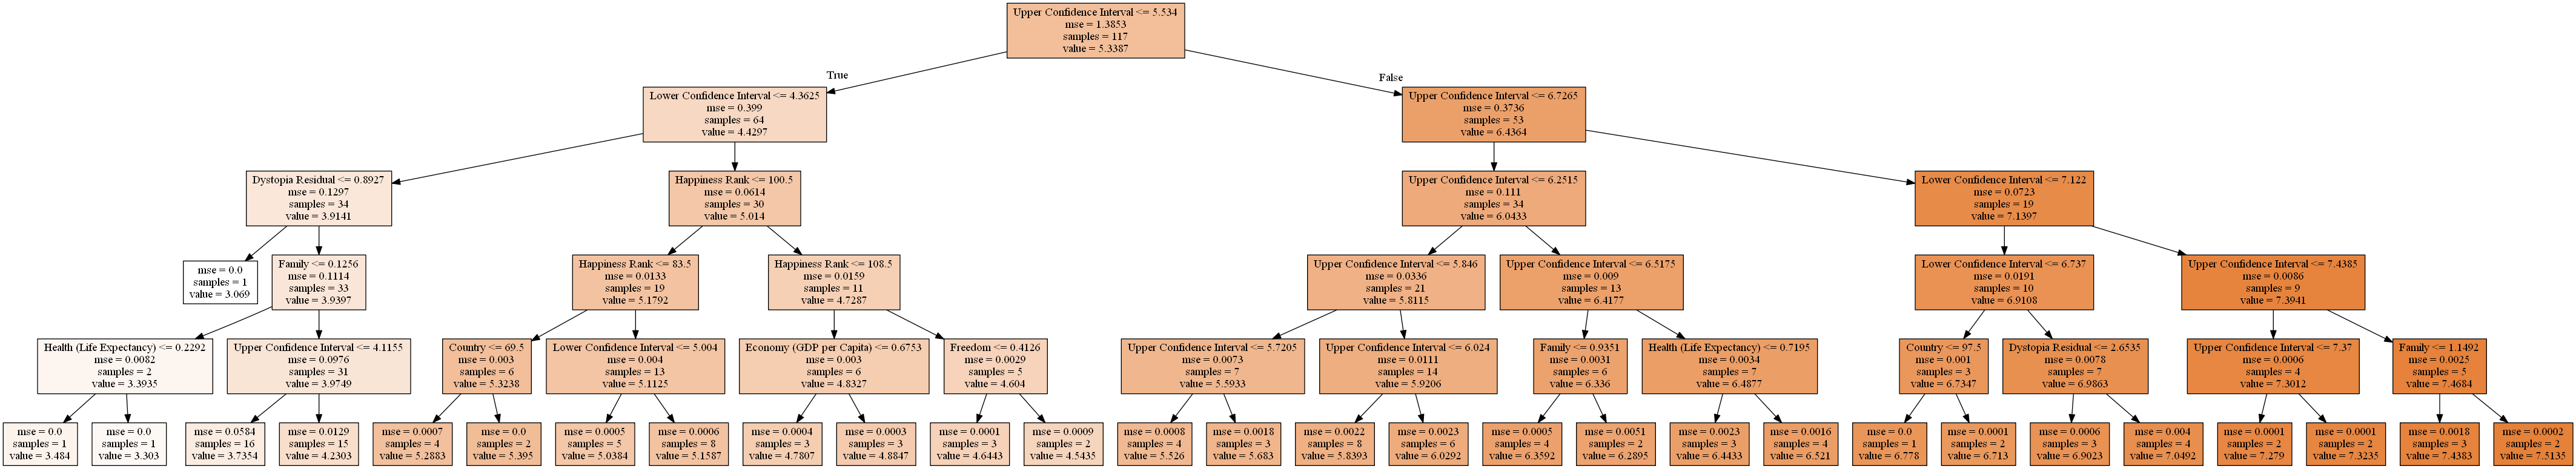

In [15]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=5)
# Initialize and train our tree.
decision_tree = tree.DecisionTreeRegressor(
    criterion='mse',
    max_features=3,
    max_depth=5,
    random_state = 1337
)

decision_tree.fit(X_train, y_train)
y_1_predictions = decision_tree.predict(X_test)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [16]:
print("\nAccuracy on training set: {:.3f}".format(decision_tree.score(X_train, y_train)))
print("\nAccuracy on test set: {:.3f}".format(decision_tree.score(X_test, y_test)))


Accuracy on training set: 0.992

Accuracy on test set: 0.993


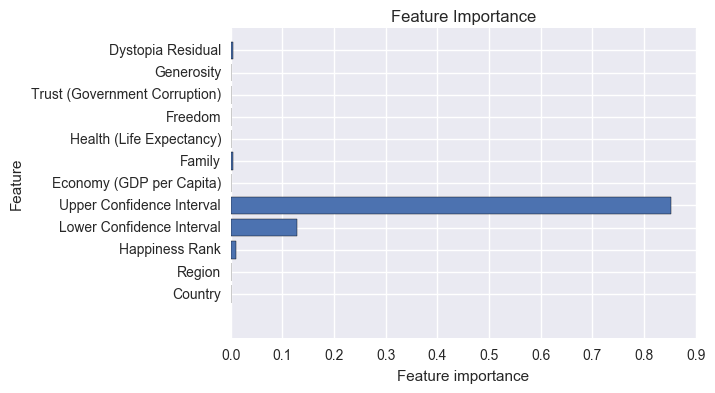

In [28]:
n_features = X.shape[1]
plt.figure()
plt.barh(range(n_features), decision_tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

### Random Forest

In [22]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestRegressor(
    n_estimators=15,
    criterion='mse',
    max_features=3,
    max_depth=5
)


In [24]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
rfc.fit(X_train, y_train)
y_predict = rfc.predict(X_test)

In [29]:
print("\nAccuracy on training set: {:.3f}".format(rfc.score(X_train, y_train)))
print("\nAccuracy on test set: {:.3f}".format(rfc.score(X_test, y_test)))


Accuracy on training set: 0.996

Accuracy on test set: 0.990


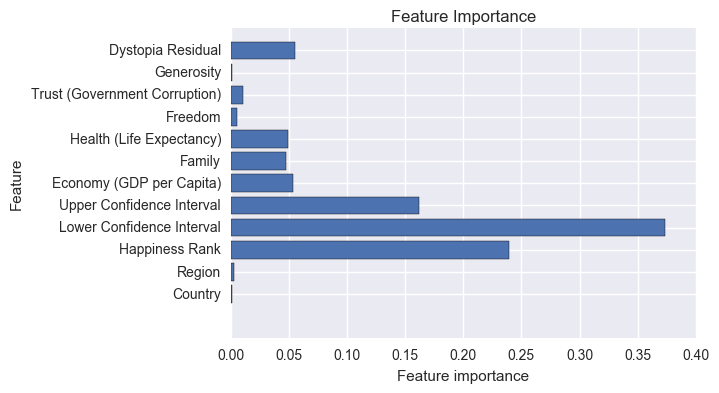

In [31]:
n_features = X.shape[1]
plt.figure()
plt.barh(range(n_features), rfc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.title("Feature Importance");